In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./hypertension data.csv')

In [3]:
df

,age,sex,chest pain,resting blood pressure,serum cholestrol in mg/dl,fbs,resting ECG results,maximun heart rate achieved,"exercise induced angina (1:yes, 0:no)",oldpeak,slope,ca,thal,target
0,57,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,64,0.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,52,1.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56,0.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,66,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26822,56,1.0,3.0,110.0,211.0,0.0,0.0,144.0,1.0,1.8,1.0,0.0,2.0,1.0
26823,41,1.0,3.0,150.0,283.0,1.0,0.0,162.0,0.0,1.0,2.0,0.0,2.0,1.0
26824,81,0.0,2.0,120.0,219.0,0.0,1.0,158.0,0.0,1.6,1.0,0.0,2.0,1.0
26825,70,0.0,2.0,120.0,340.0,0.0,1.0,172.0,0.0,0.0,2.0,0.0,2.0,1.0


### Eliminating NaN values
*We'd be going ahead and removing such entries*

In [4]:
lis = []
for i in df.index:
    if df.iloc[i,:].isnull().sum() > 0:
        lis.append(i)
        
clean_df = df.drop(lis)

### Heatmap

<Axes: >

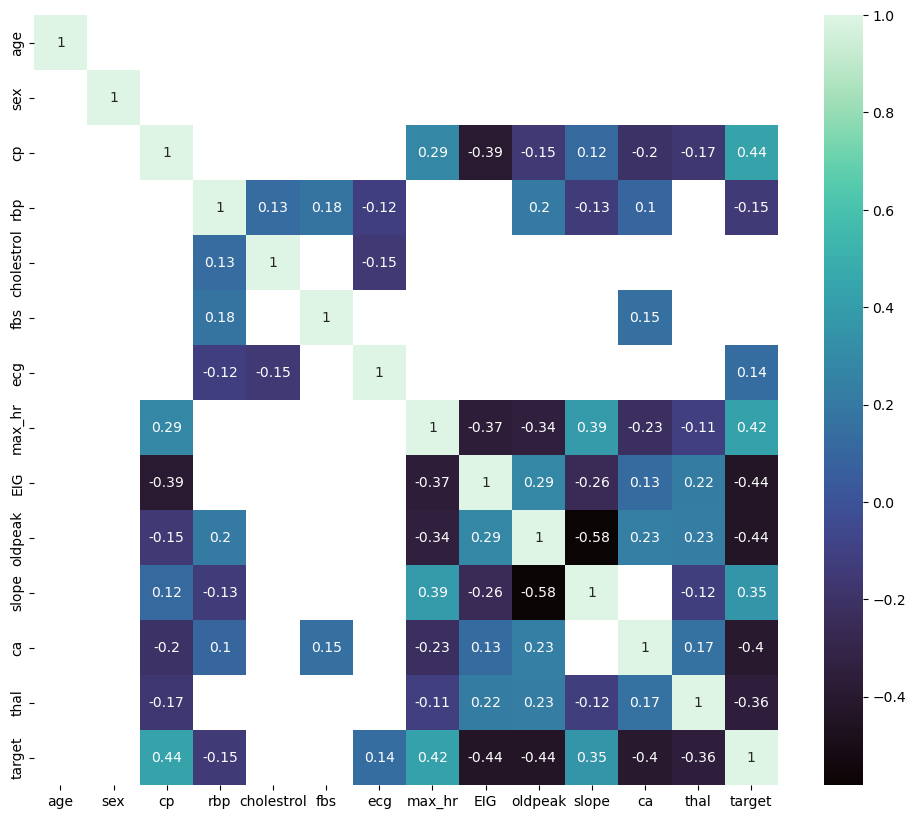

In [5]:
heatmap_df = clean_df.copy()
heatmap_df.columns = ['age', 'sex', 'cp', 'rbp', 'cholestrol', 'fbs', 'ecg', 'max_hr', 'EIG', 'oldpeak', 'slope', 'ca', 'thal', 'target']
corr = heatmap_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], cmap='mako', annot = True)

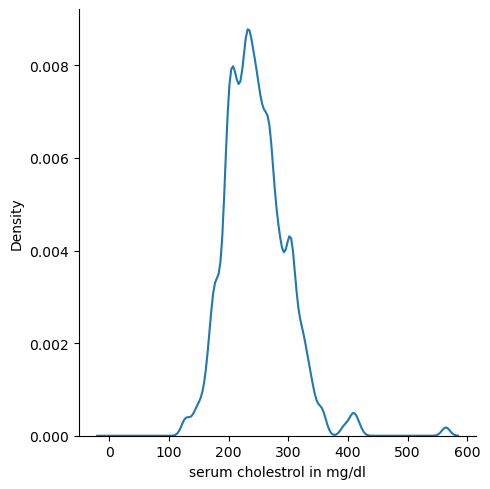

In [6]:
plt1 = sns.displot(clean_df['serum cholestrol in mg/dl'], kind='kde')

In [7]:
women_data = clean_df[clean_df['sex'] == 0.00]

<Axes: >

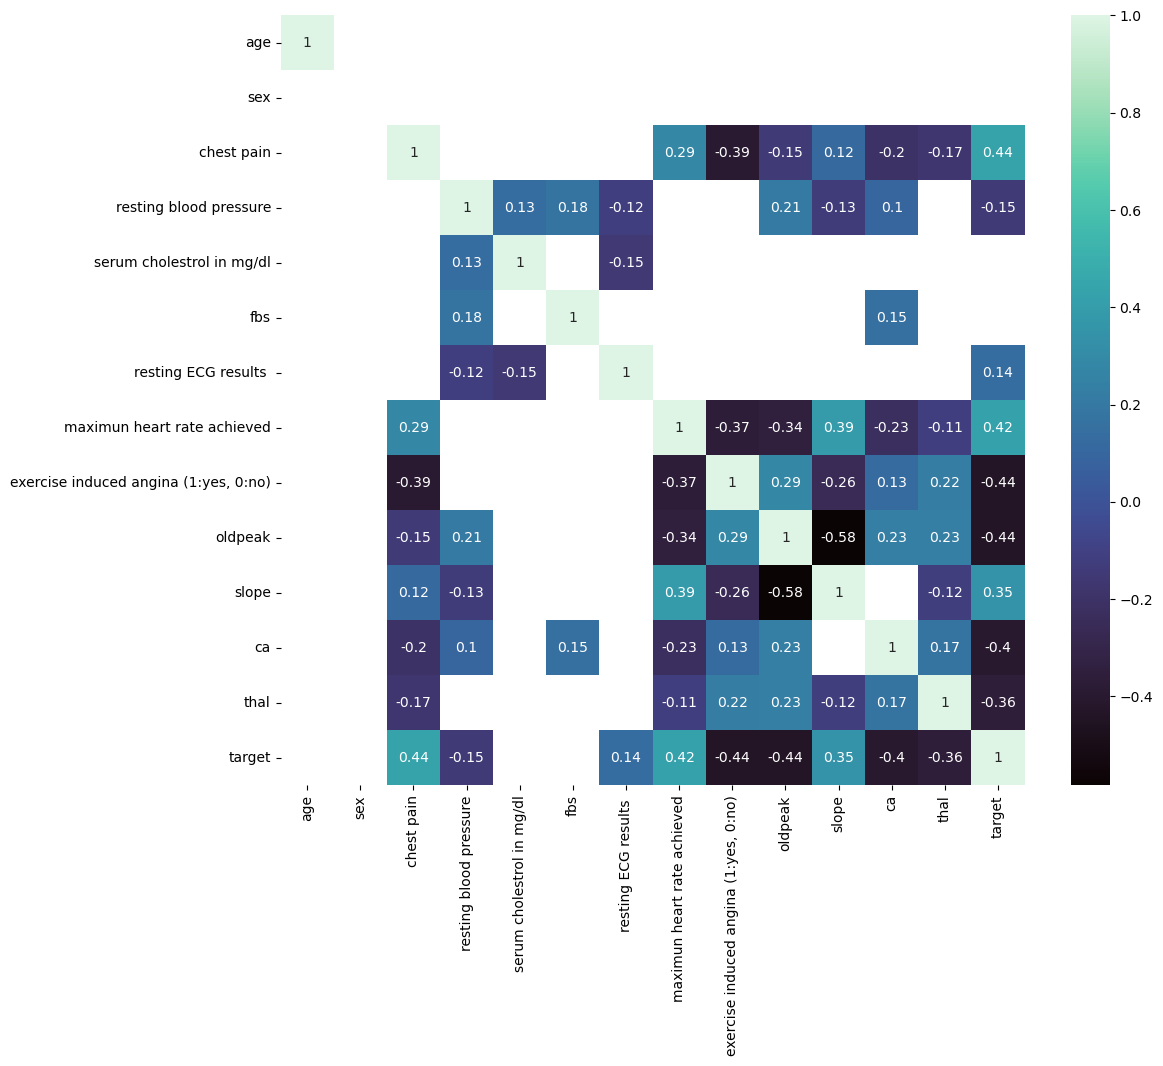

In [8]:
corr_women = women_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_women[(corr_women >= 0.1) | (corr_women <= -0.1)], cmap='mako', annot = True)

In [9]:
men_data = clean_df[clean_df['sex'] == 1.00]

<Axes: >

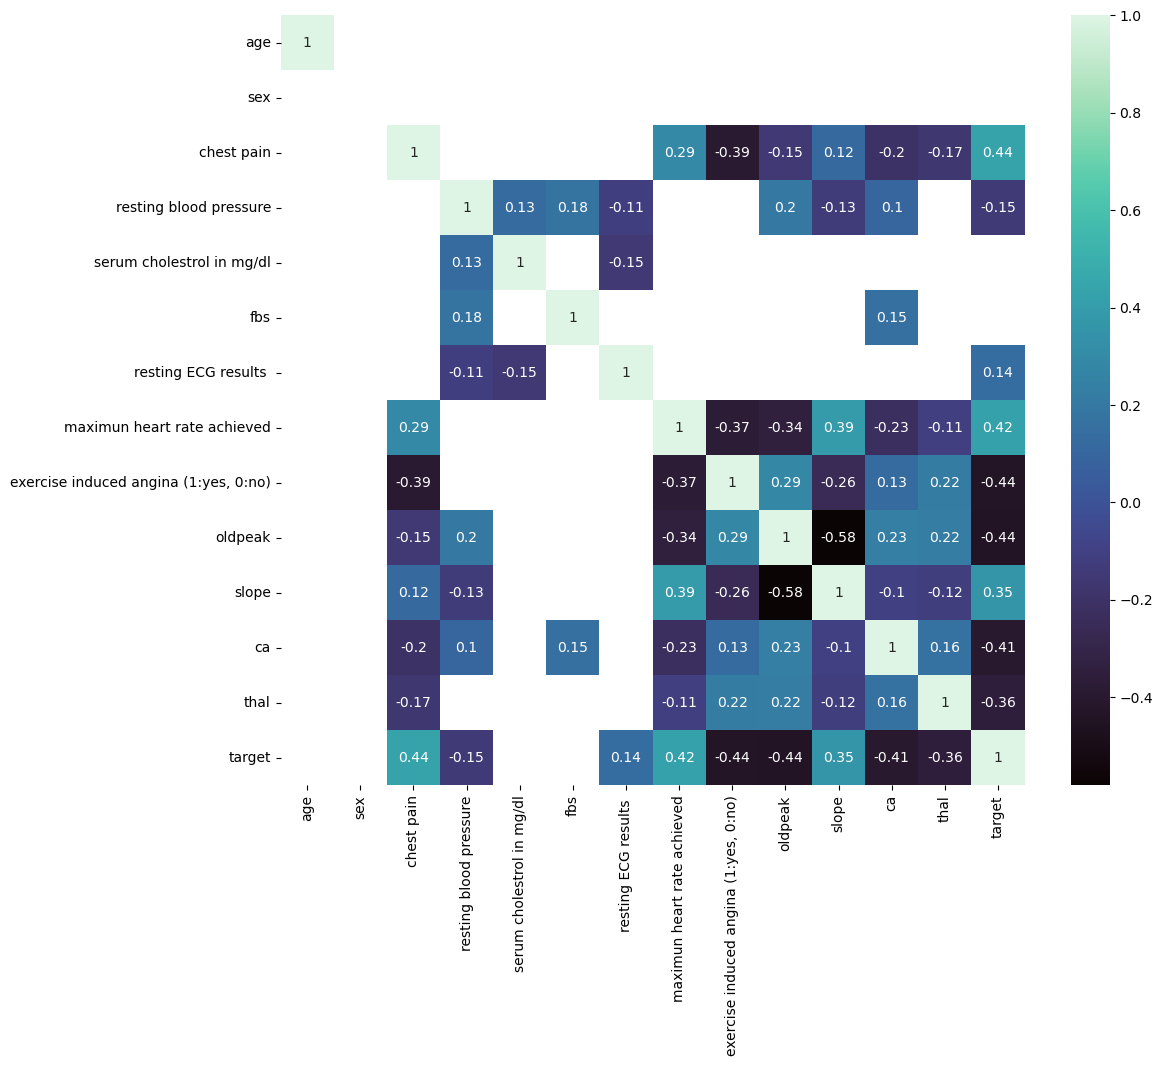

In [10]:
corr_men = men_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_men[(corr_men >= 0.1) | (corr_men <= -0.1)], cmap='mako', annot = True)

In [11]:
asymptomatic = clean_df[clean_df['chest pain'] == 0]

In [12]:
asymptomatic['thal'].value_counts()

3.0    6866
2.0    4592
1.0     981
0.0      82
Name: thal, dtype: int64

In [13]:
typical_angina = clean_df[clean_df['chest pain'] == 1]
typical_angina['thal'].value_counts()

2.0    3567
3.0     813
1.0     186
Name: thal, dtype: int64

In [14]:
atypical_angina = clean_df[clean_df['chest pain'] == 2]
print(atypical_angina['thal'].value_counts())
print(atypical_angina['resting ECG results '].value_counts())

2.0    5437
3.0    1879
1.0     163
0.0      74
Name: thal, dtype: int64
1.0    4296
0.0    3160
2.0      97
Name: resting ECG results , dtype: int64


In [15]:
non_angina = clean_df[clean_df['chest pain'] == 3]
non_angina['thal'].value_counts()

2.0    1076
3.0     691
1.0     165
Name: thal, dtype: int64

In [16]:
clean_df.columns

Index(['age', 'sex', 'chest pain', 'resting blood pressure',
       'serum cholestrol in mg/dl', 'fbs', 'resting ECG results ',
       'maximun heart rate achieved', 'exercise induced angina (1:yes, 0:no)',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
high_sugar = clean_df[clean_df['fbs'] == 1]

In [18]:
high_sugar = high_sugar.sort_values(by=['oldpeak'])

In [19]:
high_sugar['oldpeak'].value_counts()

0.0    1090
1.0     518
0.1     273
1.2     270
1.6     252
0.2     186
0.8     172
1.4     171
3.1     100
3.4      99
4.0      95
2.8      87
1.9      84
2.3      84
2.4      84
3.0      84
1.8      83
0.6      82
0.5      82
2.2      81
Name: oldpeak, dtype: int64

In [20]:
high_sugar.to_csv('high_sugar.csv')

In [21]:
age_df = clean_df.groupby(pd.cut(clean_df['age'], range(13, 100, 10)))

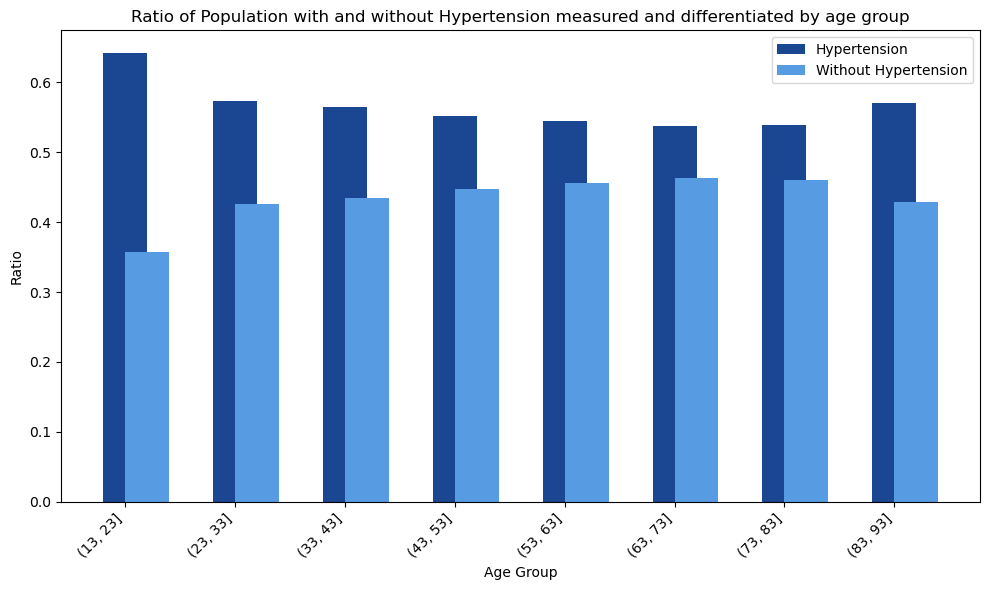

In [22]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
age_groups = age_df['age']
x = range(len(age_groups))
ax.bar(x, age_df['target'].mean(), width=0.4, label='Hypertension', align='center', color='#1B4792')
ax.bar(x, 1-age_df['target'].mean(), width=0.4, label='Without Hypertension', align='edge', color='#579CE2')
# Set the labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Ratio')
ax.set_title('Ratio of Population with and without Hypertension measured and differentiated by age group')
ax.set_xticks(x)
ax.set_xticklabels(age_groups.groups.keys(), rotation=45, ha='right')

# Add a legend
ax.legend()

# Ensure the layout is well-designed
plt.tight_layout()

C:\Users\amanc\AppData\Local\Temp\ipykernel_8\3906497309.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i-1].set_xticklabels(lis, rotation=45, ha='right')


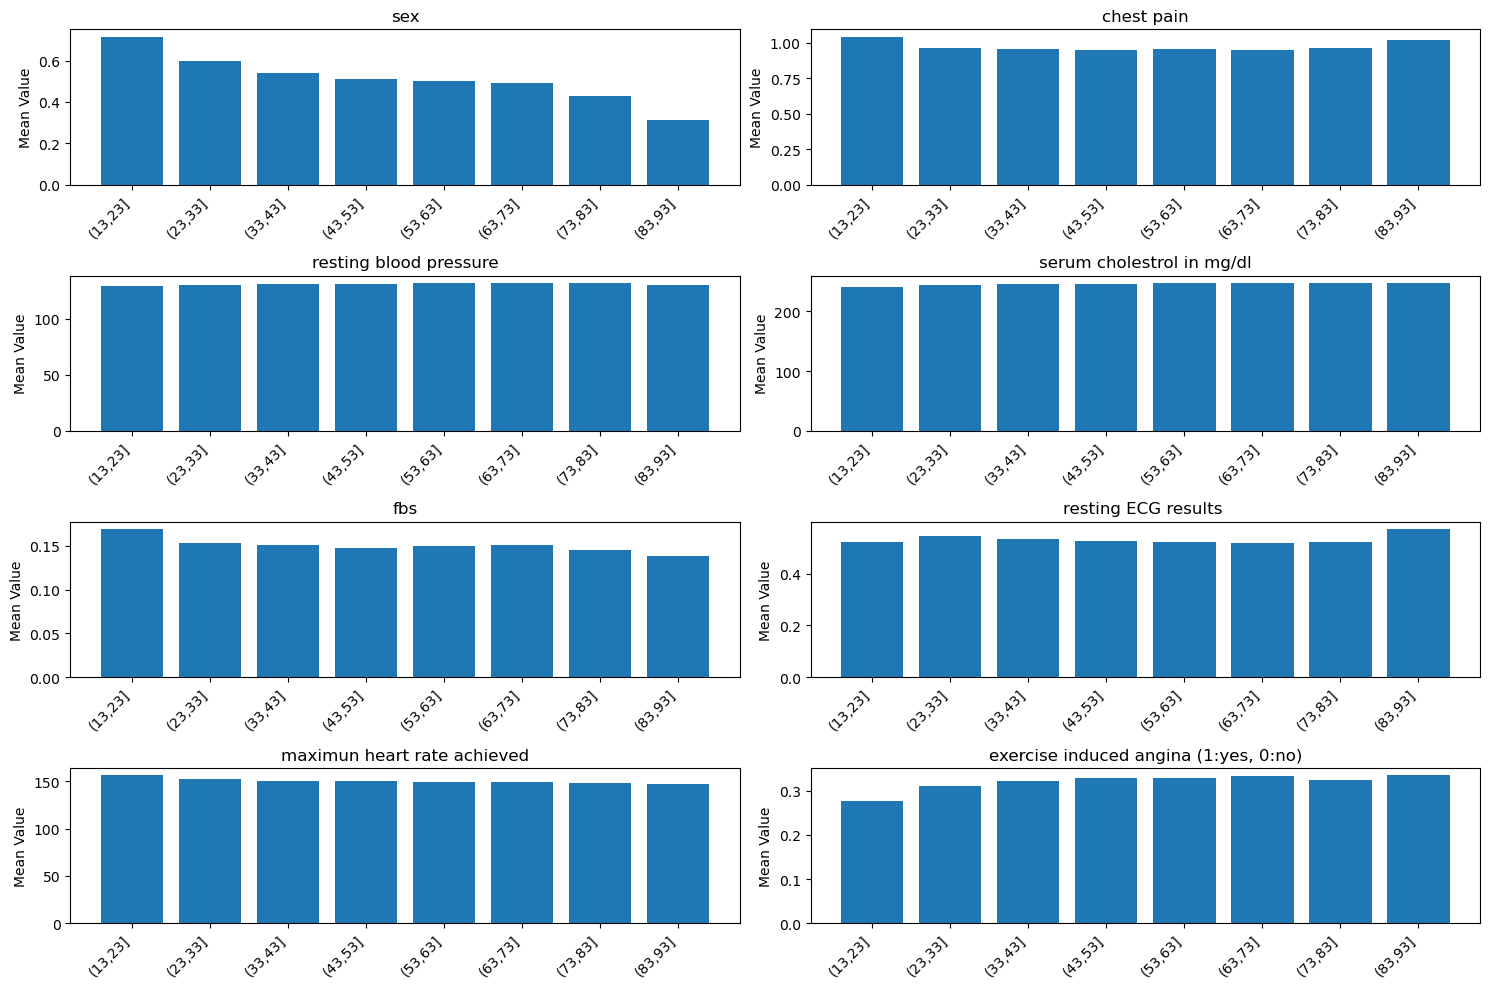

In [23]:
lis = ['(13,23]', '(23,33]', '(33,43]', '(43,53]', '(53,63]', '(63,73]', '(73,83]', '(83,93]']
values = list(df.columns)

n_rows = 4
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i in range(1, 9):
    # Create bar chart for each category
    axes[i-1].bar(lis, age_df[values[i]].mean())
    axes[i-1].set_title(values[i])
    axes[i-1].set_xticklabels(lis, rotation=45, ha='right')
    axes[i-1].set_ylabel('Mean Value')

# Adjust layout to prevent overlap
plt.tight_layout()

In [24]:
sex_df = clean_df.groupby(by=['sex'])

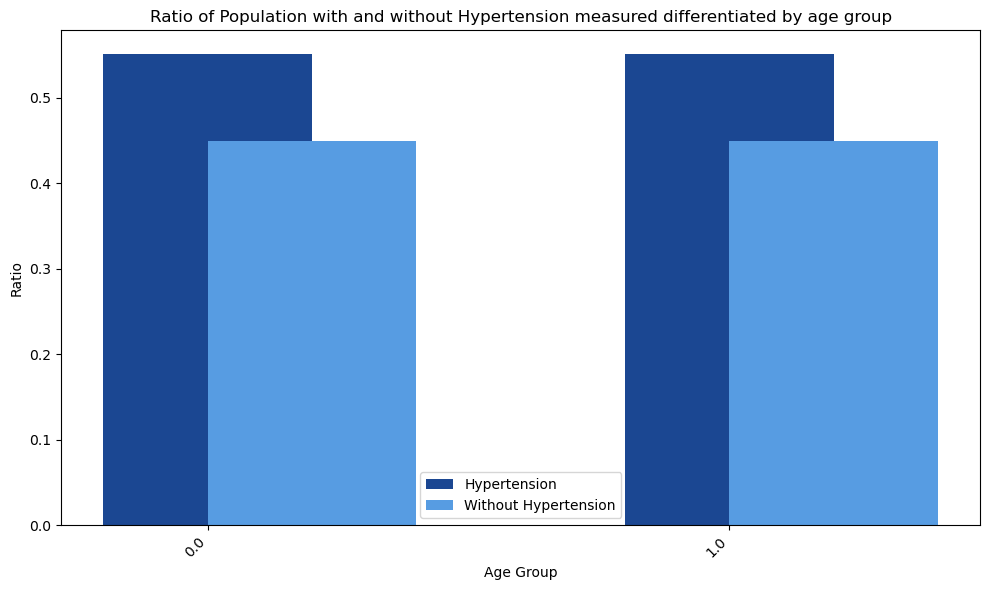

In [25]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
sex = sex_df['sex']
x = range(len(sex))
ax.bar(x, sex_df['target'].mean(), width=0.4, label='Hypertension', align='center', color='#1B4792')
ax.bar(x, 1-sex_df['target'].mean(), width=0.4, label='Without Hypertension', align='edge', color='#579CE2')
# Set the labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Ratio')
ax.set_title('Ratio of Population with and without Hypertension measured differentiated by age group')
ax.set_xticks(x)
ax.set_xticklabels(sex_df.groups.keys(), rotation=45, ha='right')

# Add a legend
ax.legend()

# Ensure the layout is well-designed
plt.tight_layout()

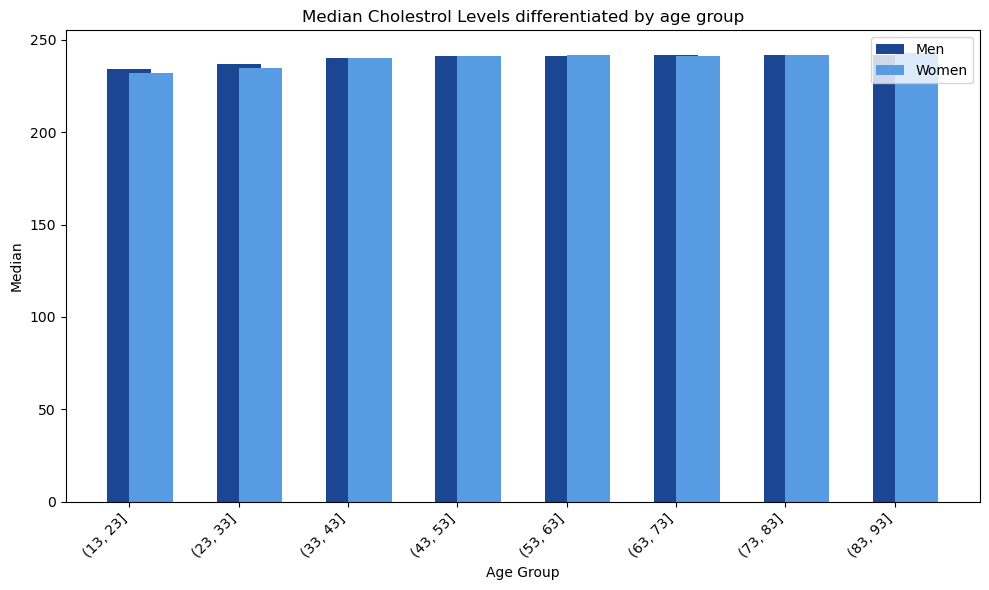

In [26]:
men_df = clean_df[clean_df['sex'] == 1]
women_df = clean_df[clean_df['sex'] == 0]

men_age_df = men_df.groupby(pd.cut(clean_df['age'], range(13, 100, 10)))
women_age_df = women_df.groupby(pd.cut(clean_df['age'], range(13, 100, 10)))
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
age_groups = age_df['age']
x = range(len(age_groups))
ax.bar(x, men_age_df['serum cholestrol in mg/dl'].median(), width=0.4, label='Men', align='center', color='#1B4792')
ax.bar(x, women_age_df['serum cholestrol in mg/dl'].median(), width=0.4, label='Women', align='edge', color='#579CE2')
# Set the labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Median')
ax.set_title('Median Cholestrol Levels differentiated by age group')
ax.set_xticks(x)
ax.set_xticklabels(age_groups.groups.keys(), rotation=45, ha='right')
#ax.set_yticks(range(130, 140 ))
# Add a legend
ax.legend()

# Ensure the layout is well-designed
plt.tight_layout()

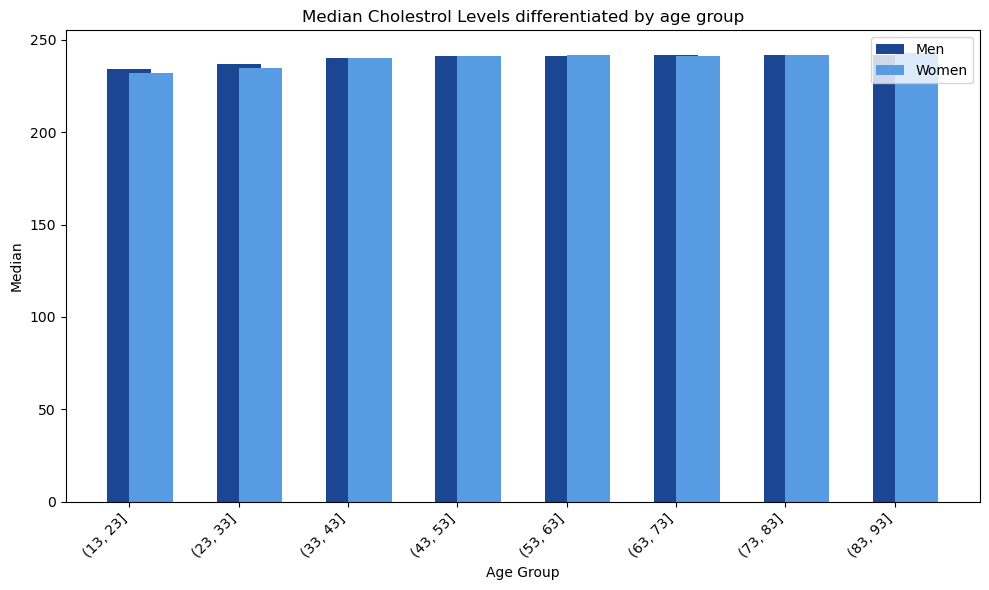

In [27]:
men_df = clean_df[clean_df['sex'] == 1]
women_df = clean_df[clean_df['sex'] == 0]

men_age_df = men_df.groupby(pd.cut(clean_df['age'], range(13, 100, 10)))
women_age_df = women_df.groupby(pd.cut(clean_df['age'], range(13, 100, 10)))
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
age_groups = age_df['age']
x = range(len(age_groups))
ax.bar(x, men_age_df['serum cholestrol in mg/dl'].median(), width=0.4, label='Men', align='center', color='#1B4792')
ax.bar(x, women_age_df['serum cholestrol in mg/dl'].median(), width=0.4, label='Women', align='edge', color='#579CE2')
# Set the labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Median')
ax.set_title('Median Cholestrol Levels differentiated by age group')
ax.set_xticks(x)
ax.set_xticklabels(age_groups.groups.keys(), rotation=45, ha='right')
#ax.set_yticks(range(130, 140 ))
# Add a legend
ax.legend()

# Ensure the layout is well-designed
plt.tight_layout()

In [28]:
hypertension = clean_df[clean_df['target']==1]

no_hypertension = clean_df[clean_df['target']==0]

C:\Users\amanc\AppData\Local\Temp\ipykernel_8\1017837970.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i-1].set_xticklabels(lis, rotation=45, ha='right')


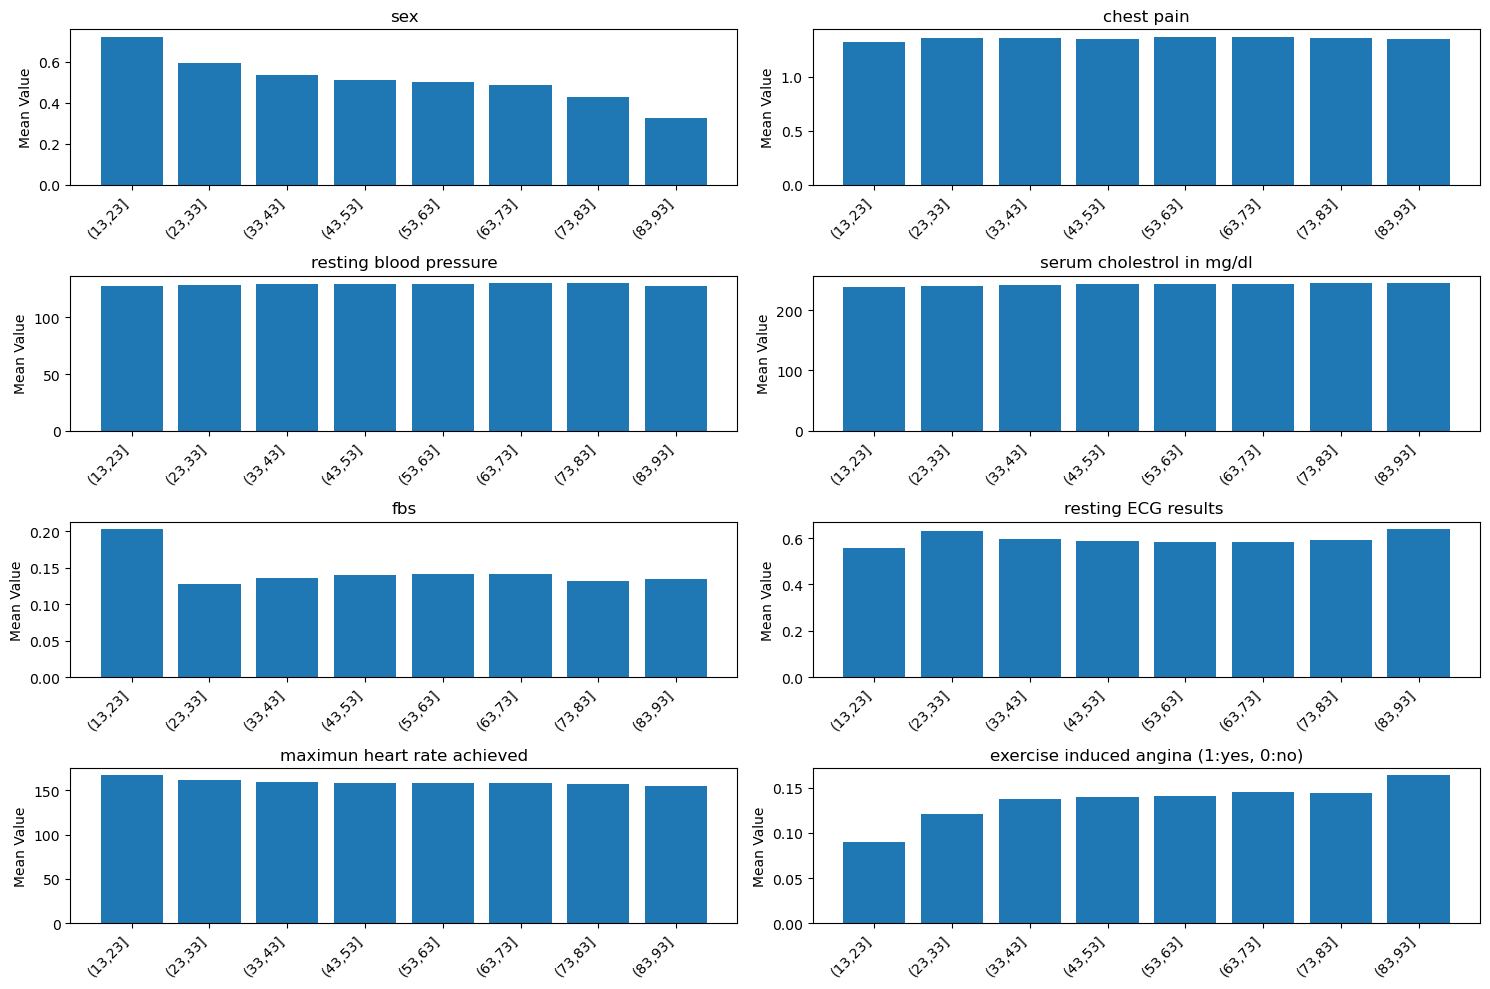

In [29]:
lis = ['(13,23]', '(23,33]', '(33,43]', '(43,53]', '(53,63]', '(63,73]', '(73,83]', '(83,93]']
age_df1 = hypertension.groupby(pd.cut(clean_df['age'], range(13, 100, 10)))
values = list(df.columns)

n_rows = 4
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i in range(1, 9):
    # Create bar chart for each category
    axes[i-1].bar(lis, age_df1[values[i]].mean())
    axes[i-1].set_title(values[i])
    axes[i-1].set_xticklabels(lis, rotation=45, ha='right')
    axes[i-1].set_ylabel('Mean Value')

# Adjust layout to prevent overlap
plt.tight_layout()

C:\Users\amanc\AppData\Local\Temp\ipykernel_8\3228443824.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i-1].set_xticklabels(lis, rotation=45, ha='right')


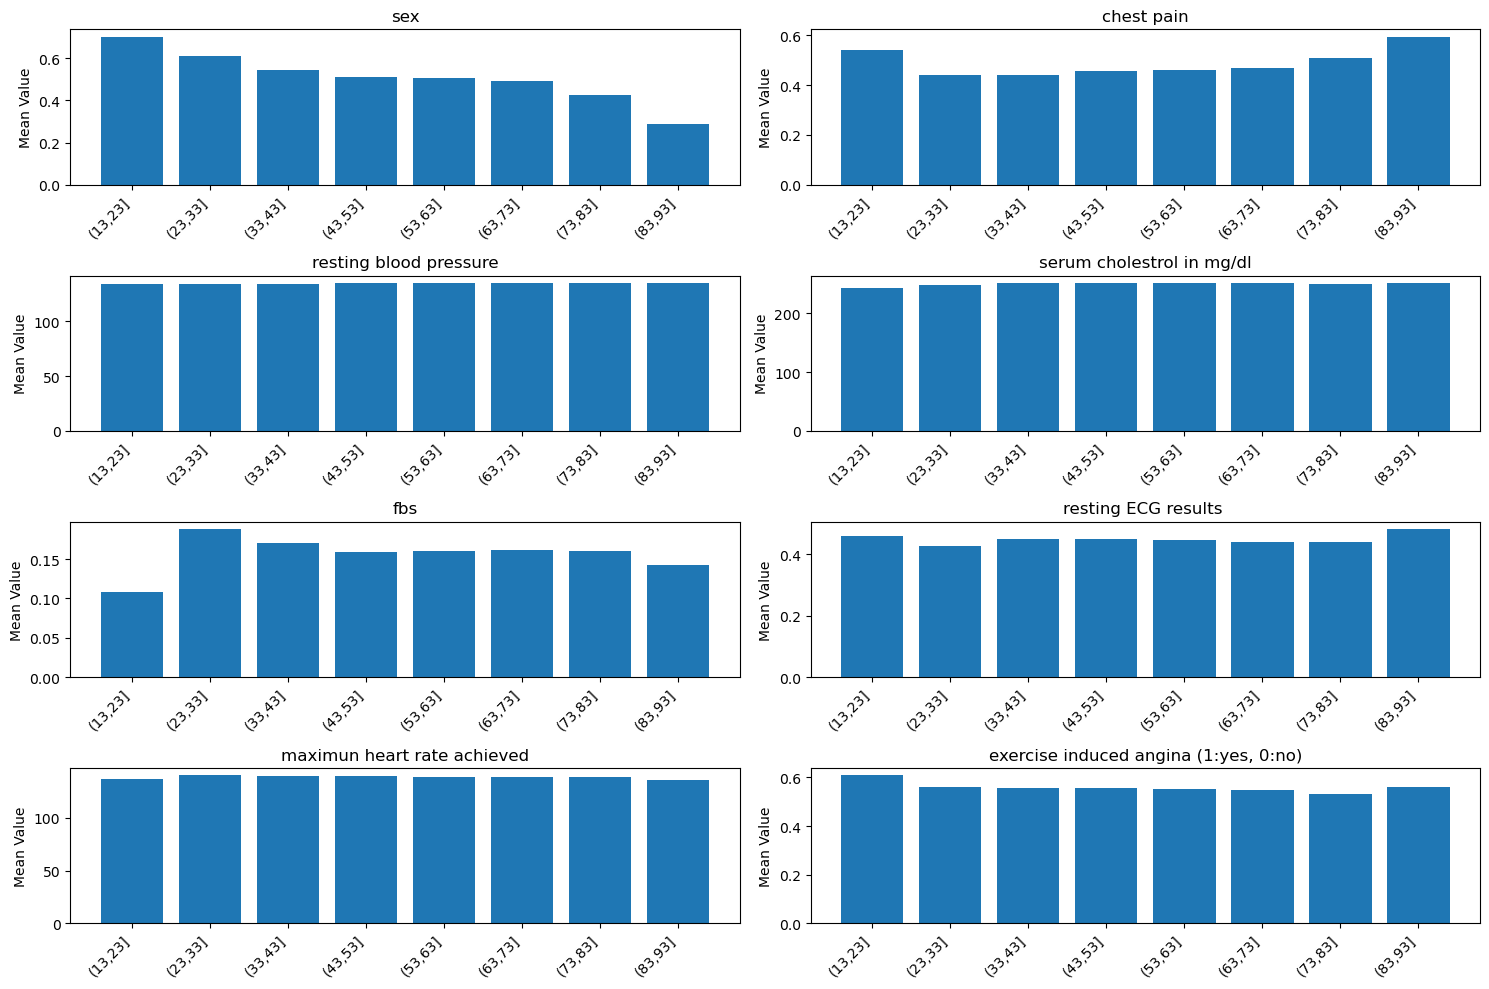

In [30]:
lis = ['(13,23]', '(23,33]', '(33,43]', '(43,53]', '(53,63]', '(63,73]', '(73,83]', '(83,93]']
age_df2 = no_hypertension.groupby(pd.cut(clean_df['age'], range(13, 100, 10)))
values = list(df.columns)

n_rows = 4
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i in range(1, 9):
    # Create bar chart for each category
    axes[i-1].bar(lis, age_df2[values[i]].mean())
    axes[i-1].set_title(values[i])
    axes[i-1].set_xticklabels(lis, rotation=45, ha='right')
    axes[i-1].set_ylabel('Mean Value')

# Adjust layout to prevent overlap
plt.tight_layout()